### Geospatial Analysis Notebook
This notebook is basically for messing around with provided shapefiles to try and get some maps working.

#### TODO:
- CRS? what to choose: **Probably not a big deal because area measurements not important, possibly distance at some point though?**
- chloropleth maps? Stacking all DFs together to make one?
- 

In [47]:
import geopandas as gpd
import pandas as pd
from pathlib import Path

#### Altalis Shape Files
Apparently its a not for profit dealing with Geo-data/Imagery company in Alberta.

In [137]:
#ls ../data/Municipal_Boundaries_SHP_Geographic/

What's the difference between all these different files? **Apparently all these files are connected, and can be loaded in at once?**
1. dbf:some old database filetype, attribute data as tables
2. prj:projection metadata file? coordinated reference system represented as text
3. shp:shapefile, contains feature geometry
4. shx:indexation data for iterations across the features?

GIS: Geographic information system mapping is the actual name for this field.

GEOPANDAS: apparently, reading in the shapfile specifically will load in all the other files?

### Files (Shape and otherwise):
1. CITY: Cities, large area, population cutoff?
2. HAMLETPT: hamlets, as dots?
3. INDIAN: indian reservations, as areas
4. Municipal Boundary Change Tracker xlsx: 
5. Municipal Boundary pdf:
6. OCTEXT: gives a bunch of line and color data for boundaries? legislative boundaries?
7. RURAL: the rest of alberta, all colored in, i.e not settlements?
8. SVILLAGE: very small villages
9. TOWN: small towns
10. urbserv: urban service areas. Sherwood park etc?
11. VILLAGE: normal sized villages? higher cutoff that svillage

In [9]:
file_path = Path("../data/Municipal_Boundaries_SHP_Geographic/")

In [17]:
city_df = gpd.read_file(file_path/"CITY.shp")
hamlet_df = gpd.read_file(file_path/"HAMLETPT.shp")
indian_df = gpd.read_file(file_path/"INDIAN.shp")
octext_df = gpd.read_file(file_path/"OCTEXT.shp")

rural_df = gpd.read_file(file_path/"RURAL.shp")
svillage_df = gpd.read_file(file_path/"SVILLAGE.shp")
town_df = gpd.read_file(file_path/"TOWN.shp")
urbserv_df = gpd.read_file(file_path/"urbserv.shp")
village_df = gpd.read_file(file_path/"VILLAGE.shp")

#### Municipal Boundary Tracker

In [50]:
boundary_df = pd.read_excel(file_path/"Municipal Boundary Change Tracker.xlsx")

In [52]:
boundary_df.shape

(420, 20)

In [54]:
boundary_df.head(3)

,Unnamed: 0,Municipal Boundary Changes,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,"Updated March 1, 2021",Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Municipality,Municipal Type \n(Boundary Affected),Rural Mapsheets \nAffected,Urban Map Sheets \nAffected,Urban Sheets \nBefore,Urban Sheets \nAfter,OIC \nNumber,OC \nYear,Effective \nDate,Update \nDate,Change Type,Comments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,County of Forty Mile No. 8,Village BDY,411006,NaN,NaN,NaN,432,2001,2002-07-01 00:00:00,2002-02-14 00:00:00,Annexation,Annexed lands to the Village of Foremost from...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The boundary pdf has the info. All are polygons, except:

Hamlet Point: Point

Order in Council text: Line (This needs further investigation)

In [11]:
city_df.head()

,CITY_ID,PID,GEONAME,GEOCODE,geometry
0,1,30130,CITY OF AIRDRIE,0003,"POLYGON ((-114.06034 51.32935, -114.04884 51.3..."
1,2,29919,CITY OF BEAUMONT,0019,"POLYGON ((-113.46430 53.36665, -113.46430 53.3..."
2,3,29928,CITY OF BROOKS,0043,"POLYGON ((-111.86062 50.57026, -111.86044 50.5..."
3,4,30131,CITY OF CALGARY,0046,"POLYGON ((-113.86556 51.01609, -113.87704 51.0..."
4,5,30132,CITY OF CAMROSE,0048,"POLYGON ((-112.86397 53.03972, -112.86388 53.0..."


In [45]:
hamlet_df.head()

,HAMLETPT_I,PID,GEONAME,GEOCODE,geometry
0,1,30226,BLACKIE,0032,POINT (-113.62149 50.60385)
1,2,30039,BOTHA,0038,POINT (-112.52199 52.30741)
2,3,34512,BURDETT,0045,POINT (-111.52285 49.83311)
3,4,30257,CAYLEY,0059,POINT (-113.84704 50.44881)
4,5,30046,CEREAL,0060,POINT (-110.80054 51.41812)


### Basic Shapefile map
Maybe have maps where each type is emphasized alone?

<AxesSubplot:>

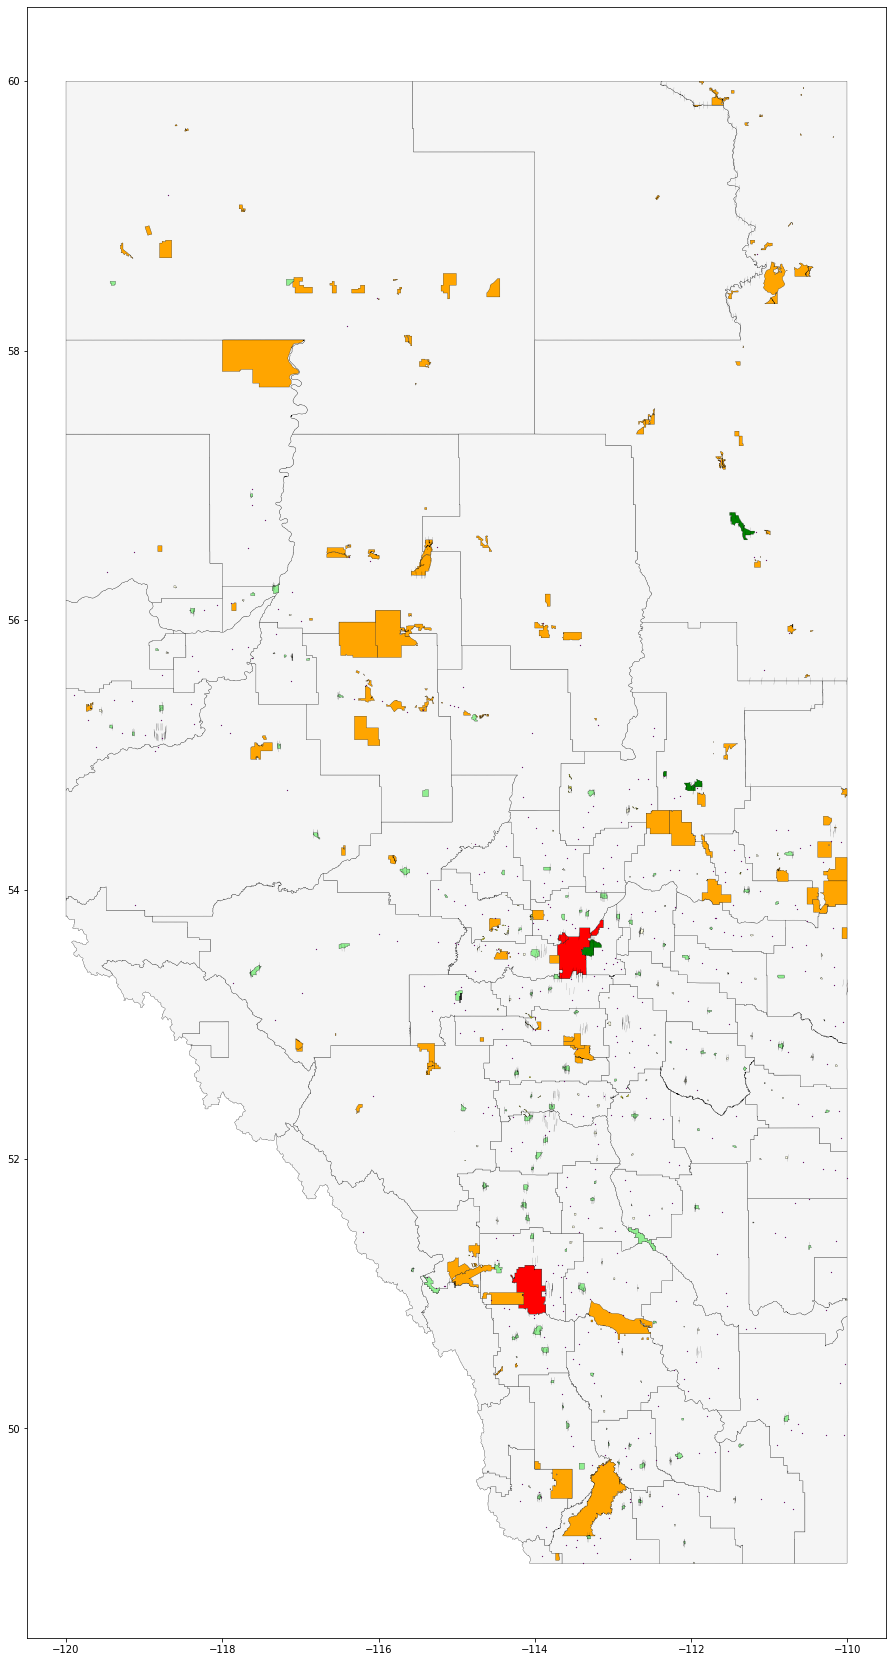

In [141]:
size = (24, 30)
lwidth=0.25
ax = city_df.plot(figsize=size, color='red', edgecolor='black', linewidth=lwidth)

rural_df.plot(figsize=size, color="whitesmoke", edgecolor="black", linewidth=lwidth, ax=ax)
urbserv_df.plot(figsize=size, color="green", edgecolor="black", linewidth=lwidth, ax=ax)
indian_df.plot(figsize=size, color="orange", edgecolor="black", linewidth=lwidth, ax=ax)

# these may need to be isolated
town_df.plot(figsize=size, color="lightgreen", edgecolor="black", linewidth=lwidth, ax=ax)
village_df.plot(figsize=size, color="lightyellow", edgecolor="black", linewidth=lwidth, ax=ax)
svillage_df.plot(figsize=size, color="yellow", edgecolor="black", linewidth=lwidth, ax=ax) # not quite visible

hamlet_df.plot(figsize=size, color="red", edgecolor="darkblue", markersize=1,
               linewidth=lwidth, zorder=2, ax=ax)
octext_df.plot(figsize=size, color="black", linewidth=7, edgecolor="black", zorder=1, ax=ax) # what is this



### Octext:
Order in council text. OIC is a type of legislation. Comparing the octext plot has it lining up with rural borders, but some areas are in the middle of nowhere. At least in the modern day? They mention microstations but I can't find anything on this. **Check them directly on website**

Example OIC: https://www.qp.alberta.ca/documents/orders/orders_in_council/2008/1008/2008_470.html
This one describes land separation in vermillion? So are these just examples of changes to the map over time?

In [139]:
octext_df.head(3)

,OCTEXT_ID,ENTITY,LEVEL,COLOR,WEIGHT,STYLE,HEIGHT,TEXT,geometry
0,1,Text,0,4,0,0,8.1,O.C. 419/2011,"LINESTRING (-110.00771 55.54737, -110.00611 55..."
1,2,Text,0,4,0,0,8.1,O.C. 419/2011,"LINESTRING (-110.16283 55.54790, -110.16122 55..."
2,3,Text,0,4,0,0,8.1,O.C.470/2008,"LINESTRING (-110.33316 53.50442, -110.33174 53..."


- text: order in council reference number
- entity: microstation entity number
- level: microstation level
- color: microstation color
- weight: microstation weight
- style: microstation style
- height: microstation text height

In [130]:
oc_features = list(octext_df.columns)
oc_features.remove("geometry")
oc_features

['OCTEXT_ID', 'ENTITY', 'LEVEL', 'COLOR', 'WEIGHT', 'STYLE', 'HEIGHT', 'TEXT']

In [ ]:
oc

In [136]:
octext_df[oc_features].nunique()

OCTEXT_ID    799
ENTITY         1
LEVEL          1
COLOR          1
WEIGHT         1
STYLE          1
HEIGHT         1
TEXT         225
dtype: int64

In [140]:
#octext_df.plot(figsize=(12, 16), color="black", linewidth=7, edgecolor="darkblue")